<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 25px; font-weight: 700; white-space: pre-wrap;">CUSTOMER CHURN ANALYSIS
</span>

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">INTRODUCTION
</span>

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> 1. Overview </span> 

 

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 15.3333px; font-weight: 500; white-space: pre-wrap;">This sample data tracks a fictional telco company's customer churn based on a variety of possible factors. The churn column indicates whether or not the customer left within the last month.</span> 

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">2. Dataset </span>

- The dataset contain three table sheets
     * demographics: describe customers infomation include Customer ID, Count, Gender, Age,...
     * services: describe the services that customers have used from the company.
     * status: describe customer status throug Satisfaction score and Customer Lifetime Value

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">3. Business question </span>

- Describe the portrait of customers.
- Build a customer churn prediction model using classification algorithm (random forest)

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">IMPORT LIBRARY
</span>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">LOADING DATASET
</span>

In [4]:
path = 'C:/Users/USER/python/project/Telco customer churn/dataset'

In [5]:
demographics = pd.read_csv(path + '/demographics.csv')
services = pd.read_csv(path + '/services.csv')
status = pd.read_csv(path + '/status.csv')

In [ ]:
sources =[demographics, services, status] 
names = ['demographics','services','status']

In [ ]:
d = {}
for i in range(len(sources)):
    d['{}'.format(names[i])] = pd.Series(list(sources[i].columns))

D = pd.DataFrame.from_dict(d).fillna('')
D

,demographics,services,status
0,Customer ID,Customer ID,Customer ID
1,Count,Count,Count
2,Gender,Quarter,Quarter
3,Age,Referred a Friend,Satisfaction Score
4,Under 30,Number of Referrals,Customer Status
5,Senior Citizen,Tenure in Months,Churn Label
6,Married,Offer,Churn Value
7,Dependents,Phone Service,Churn Score
8,Number of Dependents,Avg Monthly Long Distance Charges,CLTV
9,,Multiple Lines,Churn Category


In [ ]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB


In [ ]:
services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              3166 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [ ]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         7043 non-null   object
 1   Count               7043 non-null   int64 
 2   Quarter             7043 non-null   object
 3   Satisfaction Score  7043 non-null   int64 
 4   Customer Status     7043 non-null   object
 5   Churn Label         7043 non-null   object
 6   Churn Value         7043 non-null   int64 
 7   Churn Score         7043 non-null   int64 
 8   CLTV                7043 non-null   int64 
 9   Churn Category      1869 non-null   object
 10  Churn Reason        1869 non-null   object
dtypes: int64(5), object(6)
memory usage: 605.4+ KB


<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">CUSTOMER DEMOGRAPHICS ANALYSIS
</span>

In [ ]:
num_of_customer_gender = demographics.groupby('Gender')['Count'].count()
num_of_customer_gender

Gender
Female    3488
Male      3555
Name: Count, dtype: int64

In [ ]:
num_of_customer_age_under_30 = demographics.groupby('Under 30')['Count'].count()
num_of_customer_age_under_30

Under 30
No     5642
Yes    1401
Name: Count, dtype: int64

[Text(0.5, 1.0, 'Customer Age (Under 30)')]

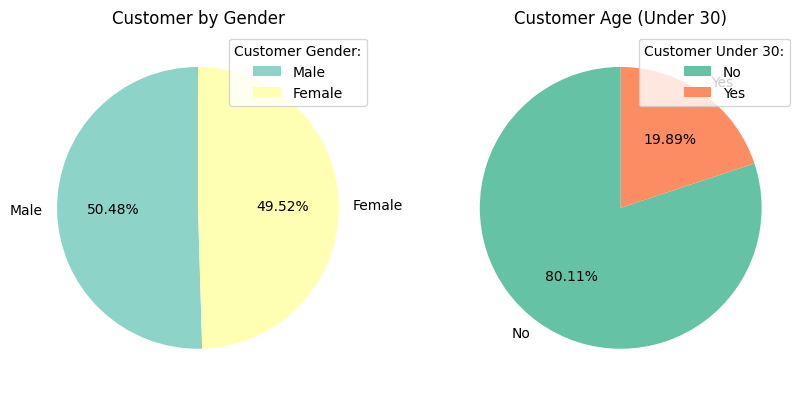

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=[10, 15], facecolor = None)

values = demographics['Gender'].value_counts().sort_values(ascending=False)
labels = demographics['Gender'].unique()
ax1.pie(values, labels=labels, startangle = 90, colors=sns.color_palette("Set3"), autopct='%1.2f%%')
ax1.legend(title = "Customer Gender:")
ax1.set(title='Customer by Gender')

values = demographics['Under 30'].value_counts().sort_values(ascending=False)
labels = demographics['Under 30'].unique()
ax2.pie(values, labels=labels, startangle = 90, colors=sns.color_palette("Set2"), autopct='%1.2f%%')
ax2.legend(title = "Customer Under 30:")
ax2.set(title = 'Customer Age (Under 30)')


<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">PROCESSING DATA
</span>

In [ ]:
# merge 'demographics_services'
dem_ser = demographics.merge(services, on='Customer ID', how='inner')
#merge'demographics_services_status'
df = dem_ser.merge(status, on='Customer ID', how= 'inner')
df = df.drop('Count_x',axis=1)
df = df.drop('Count_y',axis=1)
df = df.drop('Count',axis=1)
df = df.drop('Quarter_x',axis=1)
df = df.drop('Quarter_y',axis=1)
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,...,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,No,0,...,0.00,59.65,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Yes,1,...,390.80,1024.10,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,No,0,...,203.94,1910.88,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Yes,1,...,494.00,2995.07,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Yes,1,...,234.21,3102.36,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [ ]:
df['Under 30'] = df['Under 30'].replace({'Yes':1,'No':0})
df['Senior Citizen'] = df['Senior Citizen'].replace({'Yes':1,'No':0})
df['Married'] = df['Married'].replace({'Yes':1,'No':0})
df['Dependents'] = df['Dependents'].replace({'Yes':1,'No':0})
df['Referred a Friend'] = df['Referred a Friend'].replace({'Yes':1,'No':0})
df['Phone Service'] = df['Phone Service'].replace({'Yes':1,'No':0})
df['Multiple Lines'] = df['Multiple Lines'].replace({'Yes':1,'No':0})
df['Internet Service'] = df['Internet Service'].replace({'Yes':1,'No':0})
df['Online Security'] = df['Online Security'].replace({'Yes':1,'No':0})
df['Online Backup'] = df['Online Backup'].replace({'Yes':1,'No':0})
df['Device Protection Plan'] = df['Device Protection Plan'].replace({'Yes':1,'No':0})
df['Premium Tech Support'] = df['Premium Tech Support'].replace({'Yes':1,'No':0})
df['Streaming TV'] = df['Streaming TV'].replace({'Yes':1,'No':0})
df['Streaming Movies'] = df['Streaming Movies'].replace({'Yes':1,'No':0})
df['Streaming Music'] = df['Streaming Music'].replace({'Yes':1,'No':0})
df['Unlimited Data'] = df['Unlimited Data'].replace({'Yes':1,'No':0})
df['Paperless Billing'] = df['Paperless Billing'].replace({'Yes':1,'No':0})
df= df.select_dtypes('number')
df.head(10)


C:\Users\USER\AppData\Local\Temp\ipykernel_9144\2228010556.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Under 30'] = df['Under 30'].replace({'Yes':1,'No':0})
C:\Users\USER\AppData\Local\Temp\ipykernel_9144\2228010556.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Senior Citizen'] = df['Senior Citizen'].replace({'Yes':1,'No':0})
C:\Users\USER\AppData\Local\Temp\ipykernel_9144\2228010556.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old

,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure in Months,Phone Service,...,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV
0,78,0,1,0,0,0,0,0,1,0,...,39.65,39.65,0.00,20,0.00,59.65,3,1,91,5433
1,74,0,1,1,1,1,1,1,8,1,...,80.65,633.30,0.00,0,390.80,1024.10,3,1,69,5302
2,71,0,1,0,1,3,0,0,18,1,...,95.45,1752.55,45.61,0,203.94,1910.88,2,1,81,3179
3,78,0,1,1,1,1,1,1,25,1,...,98.50,2514.50,13.43,0,494.00,2995.07,2,1,88,5337
4,80,0,1,1,1,1,1,1,37,1,...,76.50,2868.15,0.00,0,234.21,3102.36,2,1,67,2793
5,72,0,1,0,1,1,0,0,27,1,...,78.05,2135.50,0.00,10,89.91,2235.41,1,1,95,4638
6,76,0,1,1,1,2,1,1,1,1,...,70.45,70.45,0.00,0,15.28,85.73,2,1,76,3964
7,66,0,1,1,0,0,1,6,58,0,...,45.30,2651.20,40.95,0,0.00,2610.25,1,1,91,5444
8,70,0,1,0,1,2,0,0,15,1,...,74.45,1145.70,0.00,0,661.05,1806.75,2,1,91,5717
9,77,0,1,0,1,2,0,0,7,1,...,76.45,503.60,11.05,0,188.65,681.20,2,1,81,4419


<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;"> SPLITING DATA INTO TRAINING AND TESTING SET
</span>

In [ ]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
RSEED = 50

In [ ]:
#Split Data into Training and Testing Set
X = df.drop('Churn Value', axis=1)
y = df['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [ ]:
X_train.shape

(4930, 32)

In [ ]:
X_test.shape

(2113, 32)

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">DECISION TREE
</span>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)
tree.fit(X_train, y_train)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 135 nodes with maximum depth 15.


In [ ]:
#Assess decision tree performance
train_probs = tree.predict_proba(X_train)[:,1]
probs = tree.predict_proba(X_test)[:,1]

train_predictions = tree.predict(X_train)
predictions = tree.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

Train ROC AUC Score: 1.0
Test ROC AUC  Score: 0.9615057434450676


In [ ]:
print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

Baseline ROC AUC: 0.5


<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">EVALUATING THE DECISION TREE
</span>

In [ ]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [ ]:
from collections import Counter
print(Counter(probs))
print(Counter(predictions))

Counter({0.0: 1538, 1.0: 575})
Counter({0: 1538, 1: 575})


Recall Baseline: 1.0 Test: 0.95 Train: 1.0
Precision Baseline: 0.27 Test: 0.94 Train: 1.0
Roc Baseline: 0.5 Test: 0.96 Train: 1.0


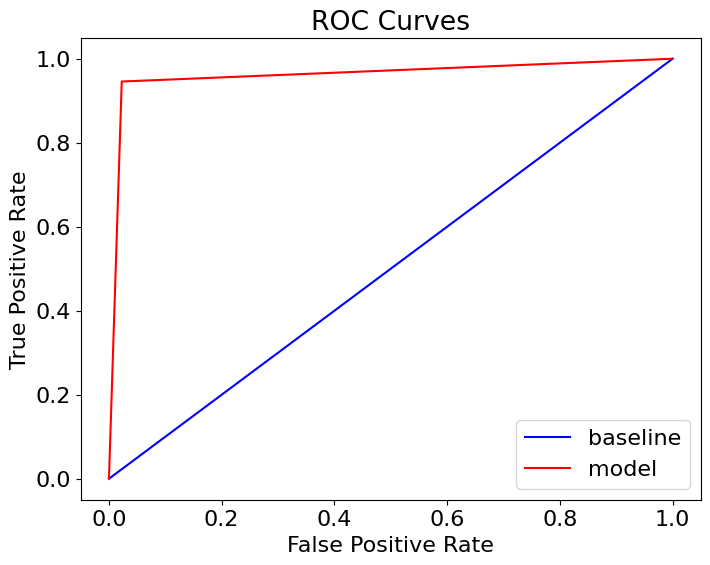

In [ ]:
evaluate_model(predictions, probs, train_predictions, train_probs)

<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">RANDOM FOREST
</span>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create the model
rf = RandomForestClassifier()
# Fit on training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Total number of nodes {int(np.sum(n_nodes))}')
print(f'Total maximum depth {int(np.sum(max_depths))}')

Total number of nodes 38136
Total maximum depth 1815


In [ ]:
train_rf_predictions = rf.predict(X_train)
train_rf_probs = rf.predict_proba(X_train)[:, 1]

rf_predictions = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

In [ ]:
print(Counter(rf_probs))
print(Counter(rf_predictions))

Counter({0.0: 486, 0.01: 270, 0.02: 188, 0.03: 122, 0.98: 92, 0.04: 89, 0.99: 78, 0.05: 71, 0.06: 57, 0.07: 46, 0.97: 46, 0.96: 43, 0.95: 38, 1.0: 38, 0.08: 35, 0.94: 26, 0.93: 25, 0.09: 25, 0.92: 20, 0.12: 18, 0.1: 14, 0.13: 14, 0.89: 13, 0.11: 12, 0.9: 11, 0.16: 11, 0.2: 10, 0.87: 10, 0.14: 10, 0.86: 10, 0.88: 9, 0.76: 8, 0.8: 7, 0.19: 7, 0.77: 7, 0.22: 7, 0.91: 7, 0.17: 6, 0.15: 6, 0.21: 6, 0.23: 5, 0.84: 5, 0.79: 5, 0.43: 5, 0.27: 5, 0.81: 5, 0.64: 4, 0.82: 4, 0.78: 4, 0.18: 4, 0.3: 4, 0.37: 3, 0.29: 3, 0.5: 3, 0.31: 3, 0.73: 3, 0.75: 3, 0.42: 3, 0.26: 3, 0.38: 3, 0.32: 3, 0.36: 3, 0.28: 3, 0.35: 2, 0.85: 2, 0.83: 2, 0.65: 2, 0.7: 2, 0.72: 2, 0.33: 2, 0.54: 2, 0.53: 1, 0.61: 1, 0.4: 1, 0.58: 1, 0.74: 1, 0.66: 1, 0.25: 1, 0.45: 1, 0.47: 1, 0.71: 1, 0.67: 1, 0.63: 1, 0.57: 1})
Counter({0: 1571, 1: 542})


Recall Baseline: 1.0 Test: 0.94 Train: 1.0
Precision Baseline: 0.27 Test: 0.99 Train: 1.0
Roc Baseline: 0.5 Test: 1.0 Train: 1.0


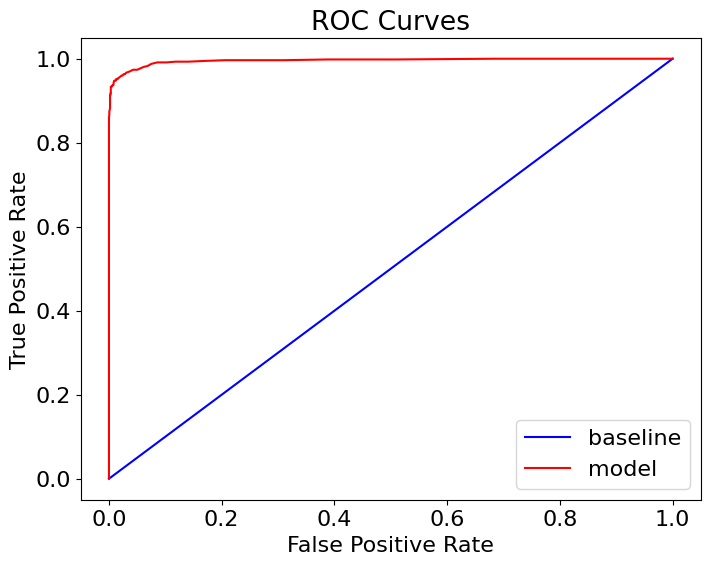

In [ ]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [ ]:
acc = accuracy_score(y_test, rf_predictions)
print("Accuracy:",acc)

Accuracy: 0.9787032654992901


<span style="color: rgb(0, 0, 0); font-family: Lato, sans-serif; font-size: 17.3333px; font-weight: 700; white-space: pre-wrap;">CONFUSION MATRIX
</span>

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 15)
    plt.xlabel('Predicted label', size = 15)

Confusion matrix, without normalization
[[1534    8]
 [  37  534]]


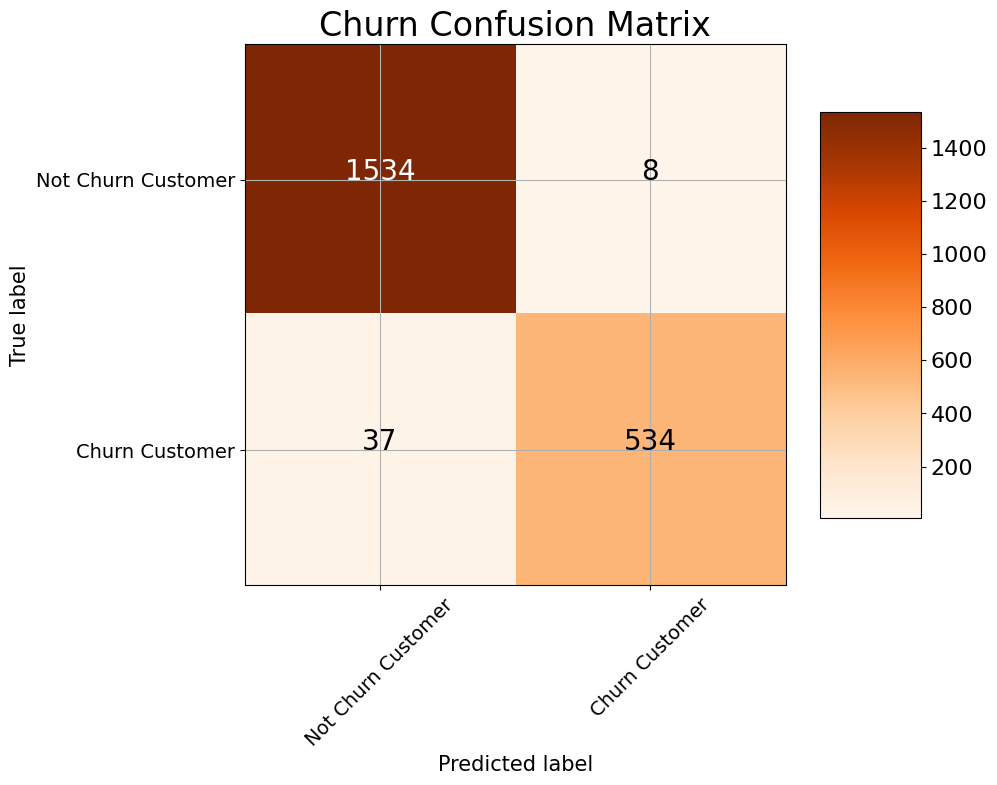

In [ ]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['Not Churn Customer', 'Churn Customer'],
                      title = 'Churn Confusion Matrix')